# Semantic similarity

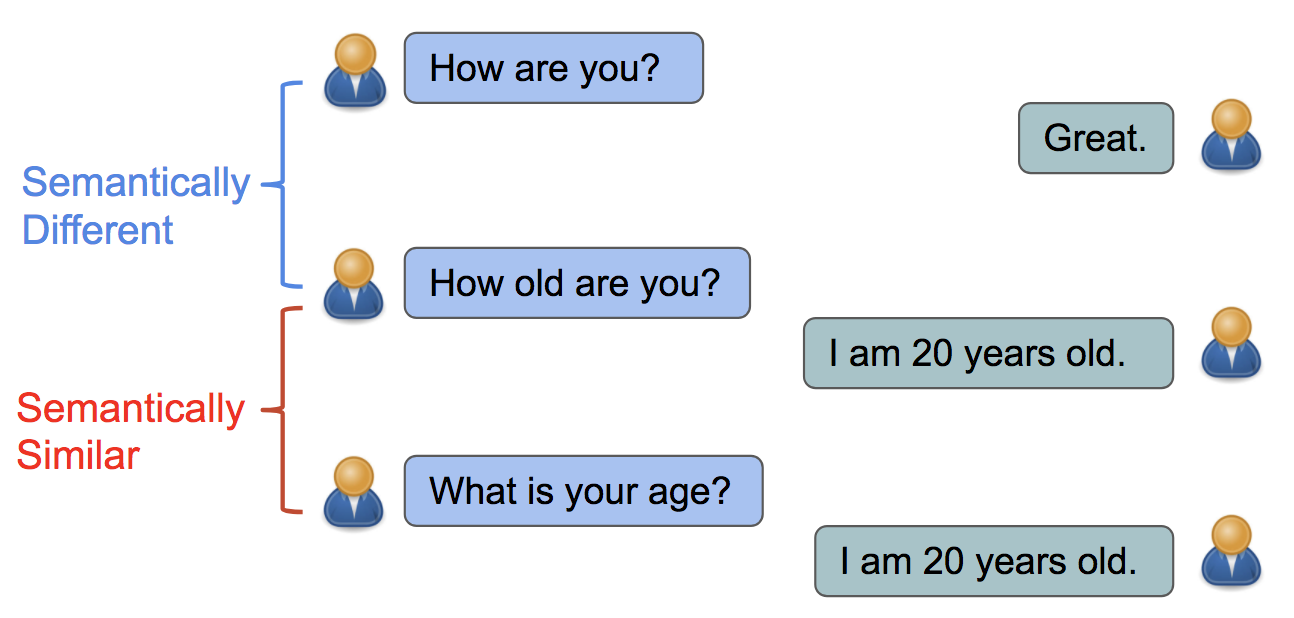

# Loading Needed libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import pickle

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
data=pd.read_csv('Text_Similarity.csv')
data

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...
...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...


# Data Cleaning

In [3]:
data.shape

(3000, 2)

In [4]:
data.columns

Index(['text1', 'text2'], dtype='object')

In [5]:
data.loc[0,'text1']

'broadband challenges tv viewing the number of europeans with broadband has exploded over the past 12 months  with the web eating into tv viewing habits  research suggests.  just over 54 million people are hooked up to the net via broadband  up from 34 million a year ago  according to market analysts nielsen/netratings. the total number of people online in europe has broken the 100 million mark. the popularity of the net has meant that many are turning away from tv  say analysts jupiter research. it found that a quarter of web users said they spent less time watching tv in favour of the net  the report by nielsen/netratings found that the number of people with fast internet access had risen by 60% over the past year.  the biggest jump was in italy  where it rose by 120%. britain was close behind  with broadband users almost doubling in a year. the growth has been fuelled by lower prices and a wider choice of always-on  fast-net subscription plans.  twelve months ago high speed internet

In [6]:
data['text2'][0]

'gardener wins double in glasgow britain s jason gardener enjoyed a double 60m success in glasgow in his first competitive outing since he won 100m relay gold at the athens olympics.  gardener cruised home ahead of scot nick smith to win the invitational race at the norwich union international. he then recovered from a poor start in the second race to beat swede daniel persson and italy s luca verdecchia. his times of 6.61 and 6.62 seconds were well short of american maurice greene s 60m world record of 6.39secs from 1998.  it s a very hard record to break  but i believe i ve trained very well   said the world indoor champion  who hopes to get closer to the mark this season.  it was important to come out and make sure i got maximum points. my last race was the olympic final and there was a lot of expectation.  this was just what i needed to sharpen up and get some race fitness. i m very excited about the next couple of months.   double olympic champion  marked her first appearance on h

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text1   3000 non-null   object
 1   text2   3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [8]:
data.duplicated().sum()

1

In [9]:
duplicated_rows = data[data.duplicated()].index

# Print index values of duplicated rows
for index in duplicated_rows:
    print(index)

627


In [10]:
data = data.drop(index)  # Drop the row with the specified index value
data = data.reset_index(drop=True)  # Reset the index and update the row numbering

In [11]:
data.isnull().sum()

text1    0
text2    0
dtype: int64

In [12]:
data.nunique()

text1    1277
text2    1256
dtype: int64

# Data Engineering/Data Wrangling

In [13]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [14]:
data['text1'] = data['text1'].apply(lambda x: clean_text(x))
data['text2'] = data['text2'].apply(lambda x: clean_text(x))

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [18]:
data['text1']= data['text1'].apply(lambda x:remove_punctuation(x))
data['text2']= data['text2'].apply(lambda x:remove_punctuation(x))
data['text1'][0]

'broadband challenges tv viewing the number of europeans with broadband has exploded over the past 12 months  with the web eating into tv viewing habits  research suggests  just over 54 million people are hooked up to the net via broadband  up from 34 million a year ago  according to market analysts nielsennetratings the total number of people online in europe has broken the 100 million mark the popularity of the net has meant that many are turning away from tv  say analysts jupiter research it found that a quarter of web users said they spent less time watching tv in favour of the net  the report by nielsennetratings found that the number of people with fast internet access had risen by 60 over the past year  the biggest jump was in italy  where it rose by 120 britain was close behind  with broadband users almost doubling in a year the growth has been fuelled by lower prices and a wider choice of alwayson  fastnet subscription plans  twelve months ago high speed internet users made up

In [19]:
def extra_clean_text(text):
    text = re.sub('\[.*\]','', text).strip() 
    text = re.sub('\(.*\)','', text).strip() 
    text = re.sub('\S*\d\S*\s*','', text).strip()   
    return text.strip()

In [20]:
data['text1']=data['text1'].apply(lambda x:extra_clean_text(x))
data['text2']=data['text2'].apply(lambda x:extra_clean_text(x))

In [21]:
import re
def tokenization(text):
    tokens = re.split('\W+',text)
#     tokens=sent_tokenize(text)
    return tokens

In [22]:
data['text1']= data['text1'].apply(lambda x:tokenization(x))
data['text2']= data['text2'].apply(lambda x:tokenization(x))

In [23]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def remove_stopwords(text):
    output= " ".join(i for i in text if i not in stopwords)
    return output

In [25]:
data['text1']= data['text1'].apply(lambda x:remove_stopwords(x))
data['text2']= data['text2'].apply(lambda x:remove_stopwords(x))

In [26]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [28]:
data['text1']=data['text1'].apply(lambda x:lemmatizer(x))
data['text2']=data['text2'].apply(lambda x:lemmatizer(x))

In [30]:
data['text1_Length'] = data['text1'].apply(lambda x: len(x))
data['text2_Length'] = data['text2'].apply(lambda x: len(x))
data

,text1,text2,text1_Length,text2_Length
0,broadband challenges tv viewing number europea...,gardener wins double glasgow britain jason gar...,1639,1870
1,rap boss arrested drug find rap mogul marion s...,amnesty chief laments war failure lack public ...,994,2029
2,player burnout worries robinson england coach ...,hanks greeted wintry premiere hollywood star t...,926,928
3,hearts oak cotonsport hearts oak set ghanaian ...,redford vision sundance despite sporting cordu...,1043,2039
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens victory la amelie mauresmo mari...,1708,1400
...,...,...,...,...
2994,uk directors guild nominees named martin scors...,steel firm cut jobs mittal steel one world lar...,1202,1092
2995,play grammy awards show irish rock band play l...,israel looks us bank chief israel asked us ban...,766,1084
2996,pountney handed ban fine northampton coach bud...,india iran gas export deal india signed deal i...,615,1025
2997,belle named best scottish band belle sebastian...,mido makes third apology ahmed mido hossam mad...,1247,1305


In [31]:
# Create a function to remove single characters from a string
def remove_single_characters(text):
    words = text.split()
    filtered_words = [word for word in words if len(word) > 1]
    return ' '.join(filtered_words)

In [32]:
data['text1']=data['text1'].apply(lambda x:remove_single_characters(x))
data['text2']=data['text2'].apply(lambda x:remove_single_characters(x))
data['text2']

0       gardener wins double glasgow britain jason gar...
1       amnesty chief laments war failure lack public ...
2       hanks greeted wintry premiere hollywood star t...
3       redford vision sundance despite sporting cordu...
4       mauresmo opens victory la amelie mauresmo mari...
                              ...                        
2994    steel firm cut jobs mittal steel one world lar...
2995    israel looks us bank chief israel asked us ban...
2996    india iran gas export deal india signed deal i...
2997    mido makes third apology ahmed mido hossam mad...
2998    former ni minister scott dies former northern ...
Name: text2, Length: 2999, dtype: object

In [33]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [34]:
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [35]:
data['text1'] =  data.text1.apply(lambda x: lemmatizer(x))
data['text2'] =  data['text2'].apply(lambda x: lemmatizer(x))

# Data Visualisation

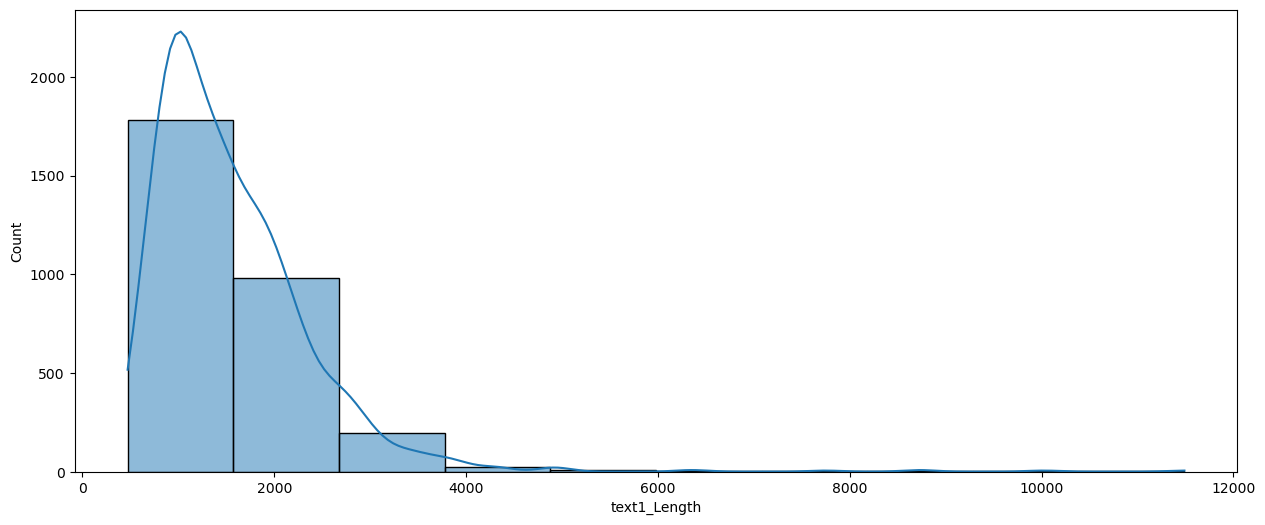

In [36]:
plt.figure(figsize=(15,6))
sns.histplot(data['text1_Length'], kde = True, bins = 10, palette = 'hls')#kde=True:kernel density estimation (KDE) plot on top of the histogram. 
plt.xticks(rotation = 0)#tick labels will be displayed horizontally
plt.show()

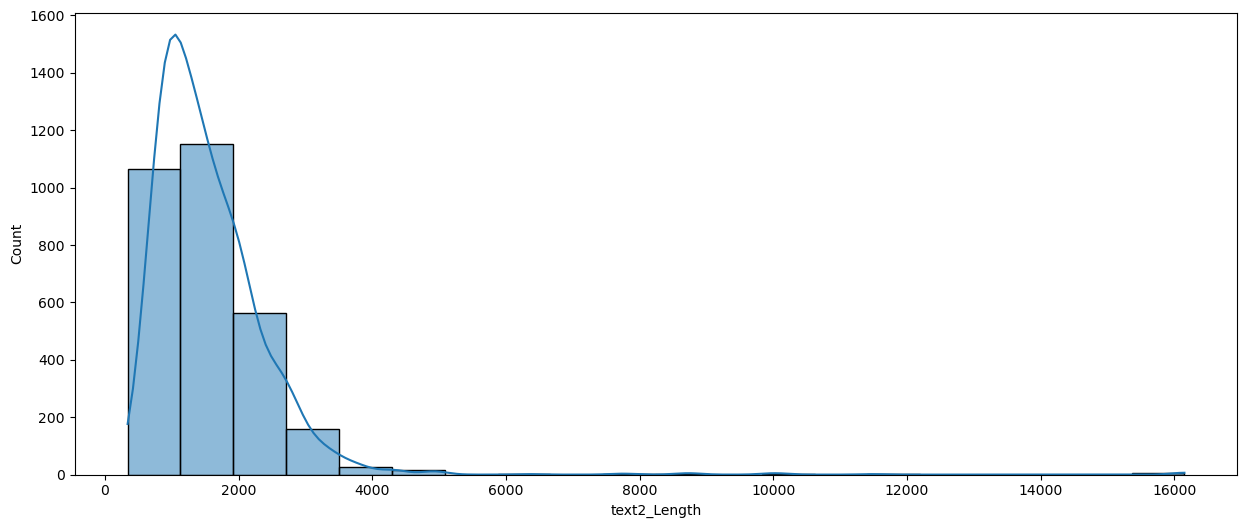

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
sns.histplot(data['text2_Length'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

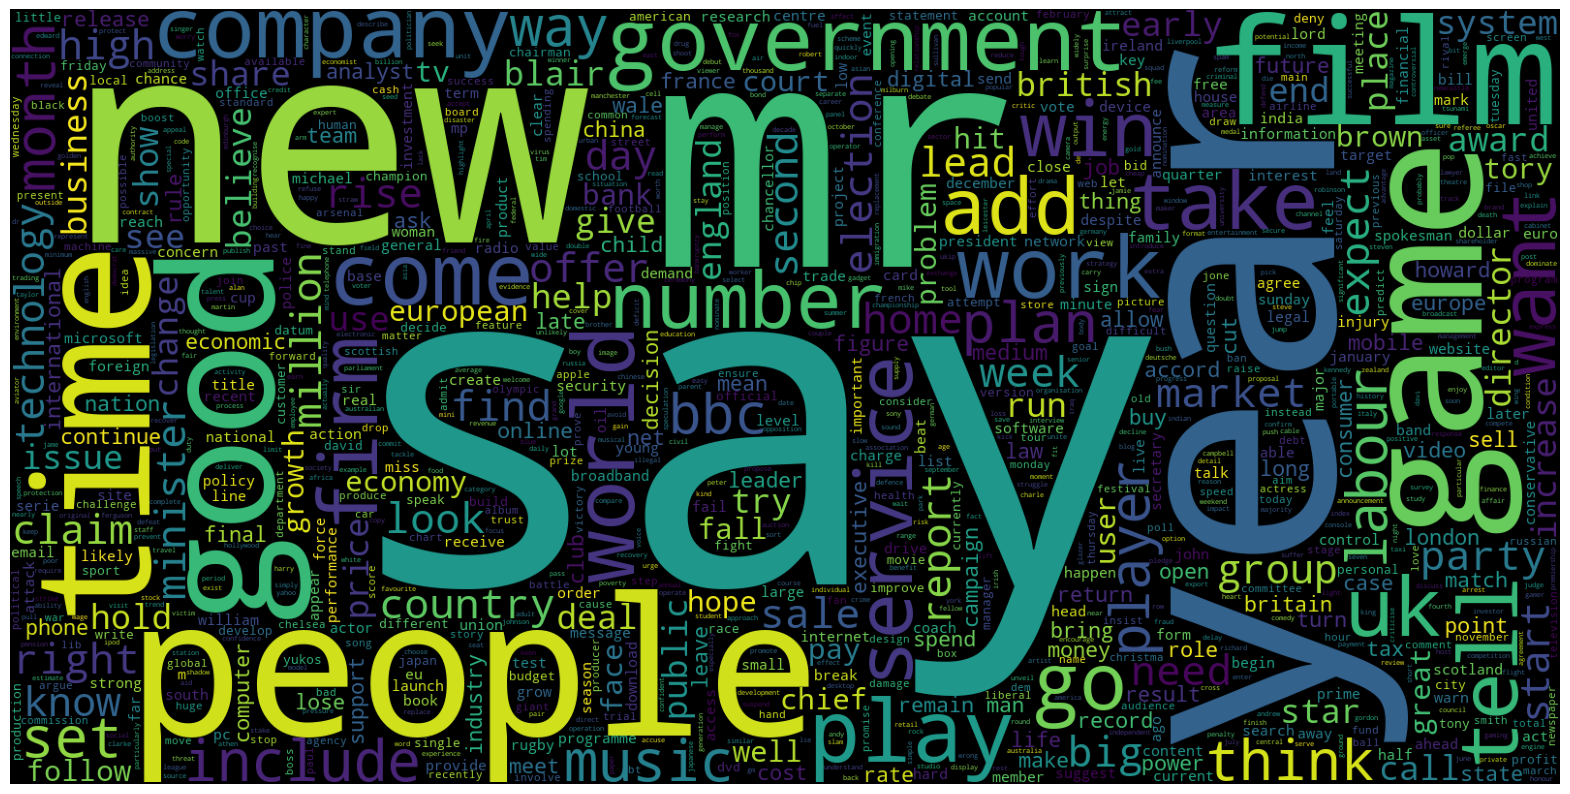

In [38]:
from wordcloud import WordCloud
content= data['text1']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(content))
plt.imshow(wc)
plt.axis('off')
plt.show()

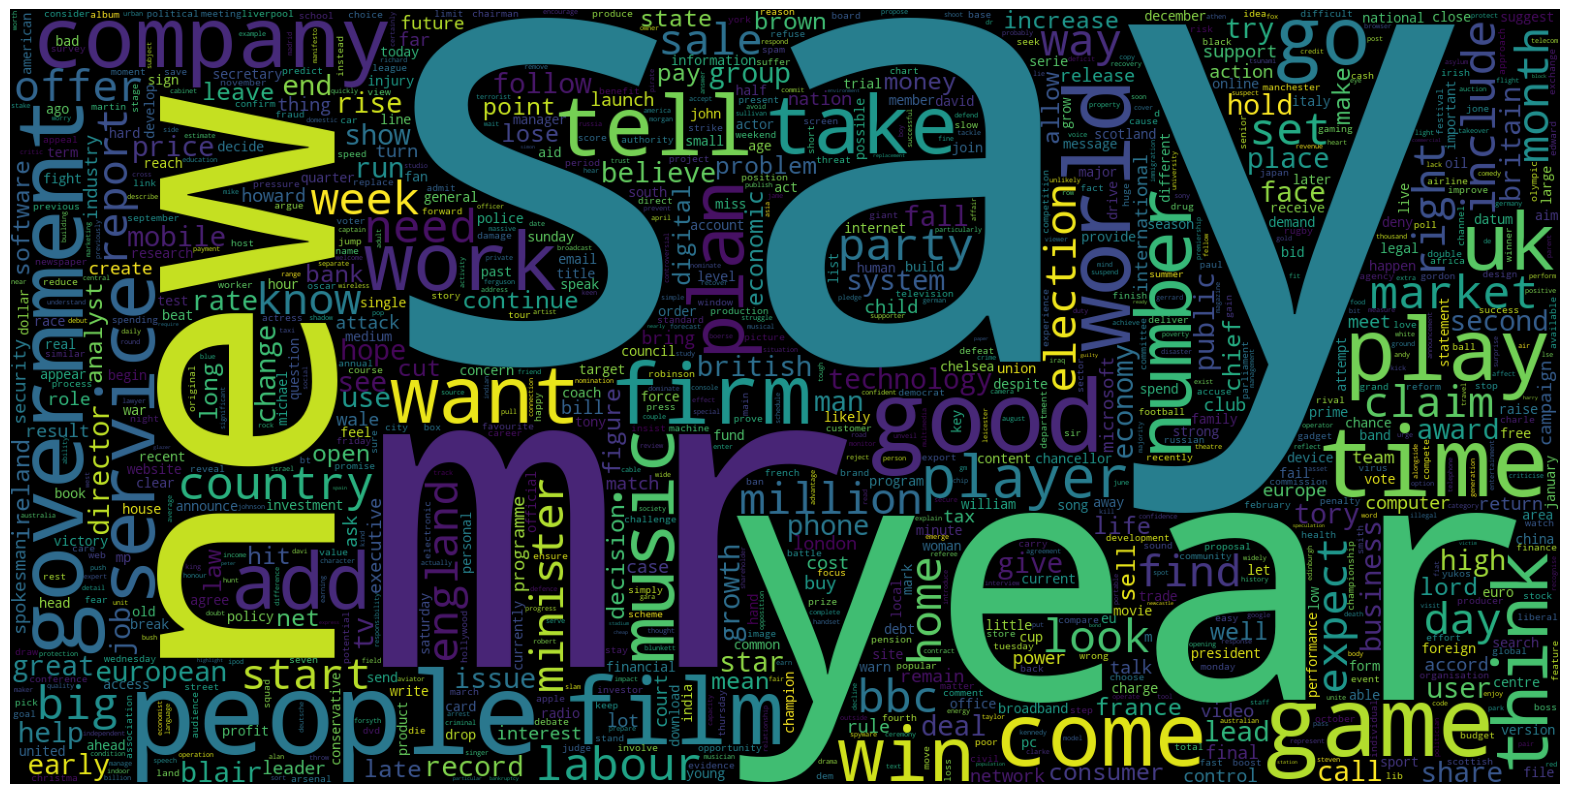

In [39]:
content1= data['text2']
plt.figure(figsize = (20,20))
wc1 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(content1))
plt.imshow(wc1)
plt.axis('off')
plt.show()

# Simliarity score calculation using Pretrained Bert Model

In [40]:
model_name='sentence-transformers/all-mpnet-base-v2'#just assignig name of the model to a variable
                                                    #we are using all-mpnet-base-v2 model from sentence-transformers of hugging face
    #"all-mpnet-base-v2" is a model based on BERT but with additional optimizations

In [41]:
model = SentenceTransformer(model_name)#creating an instance of the model

In [42]:
# data is in DataFrame with columns named 'text1'and 'text2'

# Apply model.encode() to sentence containing columns
data['sentence_vec1'] = data['text1'].apply(lambda x: model.encode([x])[0])
data['sentence_vec2'] = data['text2'].apply(lambda x: model.encode([x])[0])
data

,text1,text2,text1_Length,text2_Length,sentence_vec1,sentence_vec2
0,broadband challenge tv view number european br...,gardener win double glasgow britain jason gard...,1639,1870,"[0.002580253, 0.04517163, -0.018306233, -0.070...","[-0.05526649, 0.044598464, 0.0040951762, 0.090..."
1,rap boss arrest drug find rap mogul marion sug...,amnesty chief lament war failure lack public o...,994,2029,"[0.063478634, 0.11731333, -0.006222715, 0.0136...","[0.010735442, 0.08965676, 0.0030093547, 0.0071..."
2,player burnout worry robinson england coach an...,hank greet wintry premiere hollywood star tom ...,926,928,"[-0.0036519312, 0.070840746, -0.014631269, -0....","[0.023726614, 0.07438466, 0.0015875765, 0.0426..."
3,heart oak cotonsport heart oak set ghanaian co...,redford vision sundance despite sport corduroy...,1043,2039,"[0.029990114, 0.016715722, -0.012123679, 0.040...","[0.010664055, 0.08615237, 0.0044705523, -0.000..."
4,sir paul rock super bowl crowd sir paul mccart...,mauresmo open victory la amelie mauresmo maria...,1708,1400,"[-0.006410903, 0.072726175, -0.02243349, -0.01...","[-0.02794039, 0.10272687, -0.008000675, 0.0460..."
...,...,...,...,...,...,...
2994,uk director guild nominee name martin scorsese...,steel firm cut job mittal steel world large st...,1202,1092,"[0.005119903, 0.035549358, 0.0036227664, 0.030...","[-0.009829112, 0.016030967, -0.015333571, 0.02..."
2995,play grammy award irish rock band play live gr...,israel look bank chief israel ask banker inter...,766,1084,"[-0.036604397, 0.06337152, -0.030961948, 0.038...","[0.03546967, 0.08829607, 0.012494864, 0.010156..."
2996,pountney hand ban fine northampton coach budge...,india iran gas export deal india sign deal imp...,615,1025,"[0.01137751, 0.021000719, 0.004526663, 0.02386...","[0.028596206, 0.0609028, -0.008726817, -0.0230..."
2997,belle name good scottish band belle sebastian ...,mido make apology ahme mido hossam apology egy...,1247,1305,"[-0.0118689835, 0.012549141, -0.02189196, -0.0...","[0.07905787, 0.024859935, 0.005497577, 0.01601..."


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# Create an empty list to store similarity values
similarities = []

# Iterate over each row in the DataFrame
for i in range(len(data)):
    vec1 = data['sentence_vec1'][i]
    vec2 = data['sentence_vec2'][i]

    # Compute cosine similarity
    similarity = cosine_similarity([vec1], [vec2])[0][0]

    # Append similarity value to the list
    similarities.append(similarity)

# Assign the list of similarities to the 'similarity' column
data['similarity'] = similarities
data

,text1,text2,text1_Length,text2_Length,sentence_vec1,sentence_vec2,similarity
0,broadband challenge tv view number european br...,gardener win double glasgow britain jason gard...,1639,1870,"[0.002580253, 0.04517163, -0.018306233, -0.070...","[-0.05526649, 0.044598464, 0.0040951762, 0.090...",0.322054
1,rap boss arrest drug find rap mogul marion sug...,amnesty chief lament war failure lack public o...,994,2029,"[0.063478634, 0.11731333, -0.006222715, 0.0136...","[0.010735442, 0.08965676, 0.0030093547, 0.0071...",0.340096
2,player burnout worry robinson england coach an...,hank greet wintry premiere hollywood star tom ...,926,928,"[-0.0036519312, 0.070840746, -0.014631269, -0....","[0.023726614, 0.07438466, 0.0015875765, 0.0426...",0.159672
3,heart oak cotonsport heart oak set ghanaian co...,redford vision sundance despite sport corduroy...,1043,2039,"[0.029990114, 0.016715722, -0.012123679, 0.040...","[0.010664055, 0.08615237, 0.0044705523, -0.000...",0.126536
4,sir paul rock super bowl crowd sir paul mccart...,mauresmo open victory la amelie mauresmo maria...,1708,1400,"[-0.006410903, 0.072726175, -0.02243349, -0.01...","[-0.02794039, 0.10272687, -0.008000675, 0.0460...",0.212264
...,...,...,...,...,...,...,...
2994,uk director guild nominee name martin scorsese...,steel firm cut job mittal steel world large st...,1202,1092,"[0.005119903, 0.035549358, 0.0036227664, 0.030...","[-0.009829112, 0.016030967, -0.015333571, 0.02...",0.139114
2995,play grammy award irish rock band play live gr...,israel look bank chief israel ask banker inter...,766,1084,"[-0.036604397, 0.06337152, -0.030961948, 0.038...","[0.03546967, 0.08829607, 0.012494864, 0.010156...",0.246059
2996,pountney hand ban fine northampton coach budge...,india iran gas export deal india sign deal imp...,615,1025,"[0.01137751, 0.021000719, 0.004526663, 0.02386...","[0.028596206, 0.0609028, -0.008726817, -0.0230...",0.019759
2997,belle name good scottish band belle sebastian ...,mido make apology ahme mido hossam apology egy...,1247,1305,"[-0.0118689835, 0.012549141, -0.02189196, -0.0...","[0.07905787, 0.024859935, 0.005497577, 0.01601...",0.082858


In [47]:
scaler = MinMaxScaler()
data['similarity'] = scaler.fit_transform(data['similarity'].values.reshape(-1, 1))

In [48]:
data1 = data[['text1','text2','similarity']]
data1

,text1,text2,similarity
0,broadband challenge tv view number european br...,gardener win double glasgow britain jason gard...,0.358239
1,rap boss arrest drug find rap mogul marion sug...,amnesty chief lament war failure lack public o...,0.375318
2,player burnout worry robinson england coach an...,hank greet wintry premiere hollywood star tom ...,0.204524
3,heart oak cotonsport heart oak set ghanaian co...,redford vision sundance despite sport corduroy...,0.173156
4,sir paul rock super bowl crowd sir paul mccart...,mauresmo open victory la amelie mauresmo maria...,0.254308
...,...,...,...
2994,uk director guild nominee name martin scorsese...,steel firm cut job mittal steel world large st...,0.185063
2995,play grammy award irish rock band play live gr...,israel look bank chief israel ask banker inter...,0.286299
2996,pountney hand ban fine northampton coach budge...,india iran gas export deal india sign deal imp...,0.072078
2997,belle name good scottish band belle sebastian ...,mido make apology ahme mido hossam apology egy...,0.131809


In [49]:
import pickle

with open('bert_model.pkl', 'wb') as file:
    pickle.dump(model, file)